In [107]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import ast
from scipy.interpolate import make_interp_spline
from sklearn import metrics
import seaborn as sns
from scipy.fft import fft,dct,ifft
import warnings
warnings.filterwarnings("ignore")

In [108]:
dataset = pd.read_csv('one_hot_encoded_dataset.csv')
dataset.head()

,type,flight_month,num_of_stops,formatted_price,distance_bet_2_countries,one_stop_in,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,1,2,1,54306,0.984105,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,2,1,17829,0.755223,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,1,14150,0.451862,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,2,1,13258,0.258401,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,2,0,6363,0.653497,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


# Splitting the data

In [109]:
cols = list(dataset.columns.values)
dataset = dataset[cols[0:3]+ cols[4:34] + [cols[3]]]

In [110]:
y_train = np.log(dataset['formatted_price'][:192167])
y_test = np.log(dataset['formatted_price'][192167:])

In [111]:
dataset.drop(columns=['formatted_price'],axis=1,inplace=True)

In [112]:
x_train = dataset[:192167]
x_test = dataset[192167:]

# Model - 1

In [113]:
from xgboost import XGBRegressor
model1 =  XGBRegressor()
model1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [114]:
y_pred =  model1.predict(x_test)

print('Training Score :',model1.score(x_train, y_train))
print('Test Score     :',model1.score(x_test, y_test))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))

Training Score : 0.9334697268591544
Test Score     : 0.9568045900208076
Mean Squared Error : 0.06082072323337562


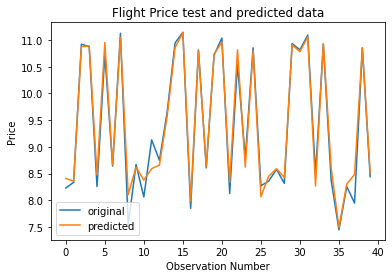

In [115]:
N=40

x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, y_pred[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Model - 2

In [116]:
from sklearn import linear_model
model2 = linear_model.PoissonRegressor()
model2.fit(x_train,y_train)

PoissonRegressor()

In [117]:
y_pred1 =  model2.predict(x_test)

print('Training Score :',model2.score(x_train, y_train))
print('Test Score     :',model2.score(x_test, y_test))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred1))

Training Score : 0.8022741972738986
Test Score     : 0.7795763614783733
Mean Squared Error : 0.3026388695168323


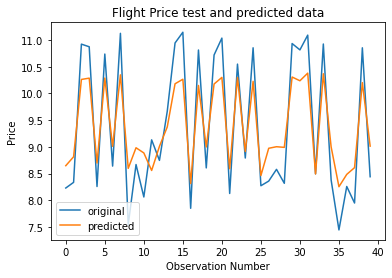

In [118]:
N=40

x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, y_pred1[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Model - 3

In [119]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
model3 = HistGradientBoostingRegressor()
model3.fit(x_train,y_train)

HistGradientBoostingRegressor()

In [120]:
y_pred2 =  model3.predict(x_test)

print('Training Score :',model3.score(x_train, y_train))
print('Test Score     :',model3.score(x_test, y_test))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred2))

Training Score : 0.9266505793458254
Test Score     : 0.953306701230027
Mean Squared Error : 0.06574587908089914


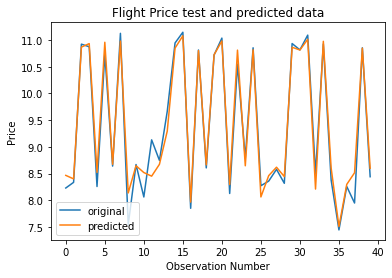

In [121]:
N=40

x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, y_pred2[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Model - 4

In [123]:
import lightgbm as ltb
model4 = ltb.LGBMRegressor()
model4.fit(x_train,y_train)

LGBMRegressor()

In [124]:
y_pred2 =  model3.predict(x_test)

print('Training Score :',model3.score(x_train, y_train))
print('Test Score     :',model3.score(x_test, y_test))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred2))

Training Score : 0.9266505793458254
Test Score     : 0.953306701230027
Mean Squared Error : 0.06574587908089914


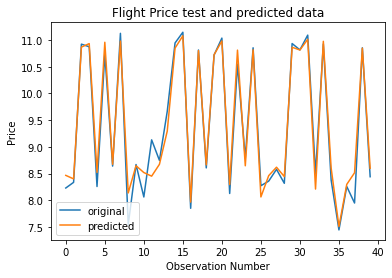

In [125]:
N=40

x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, y_pred2[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()